In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("data.csv")

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [3]:
df.shape

(103904, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [7]:
df.drop(columns=["Unnamed: 0", "id"], inplace=True)

In [8]:
df.duplicated().any()

False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [10]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

## Visualization

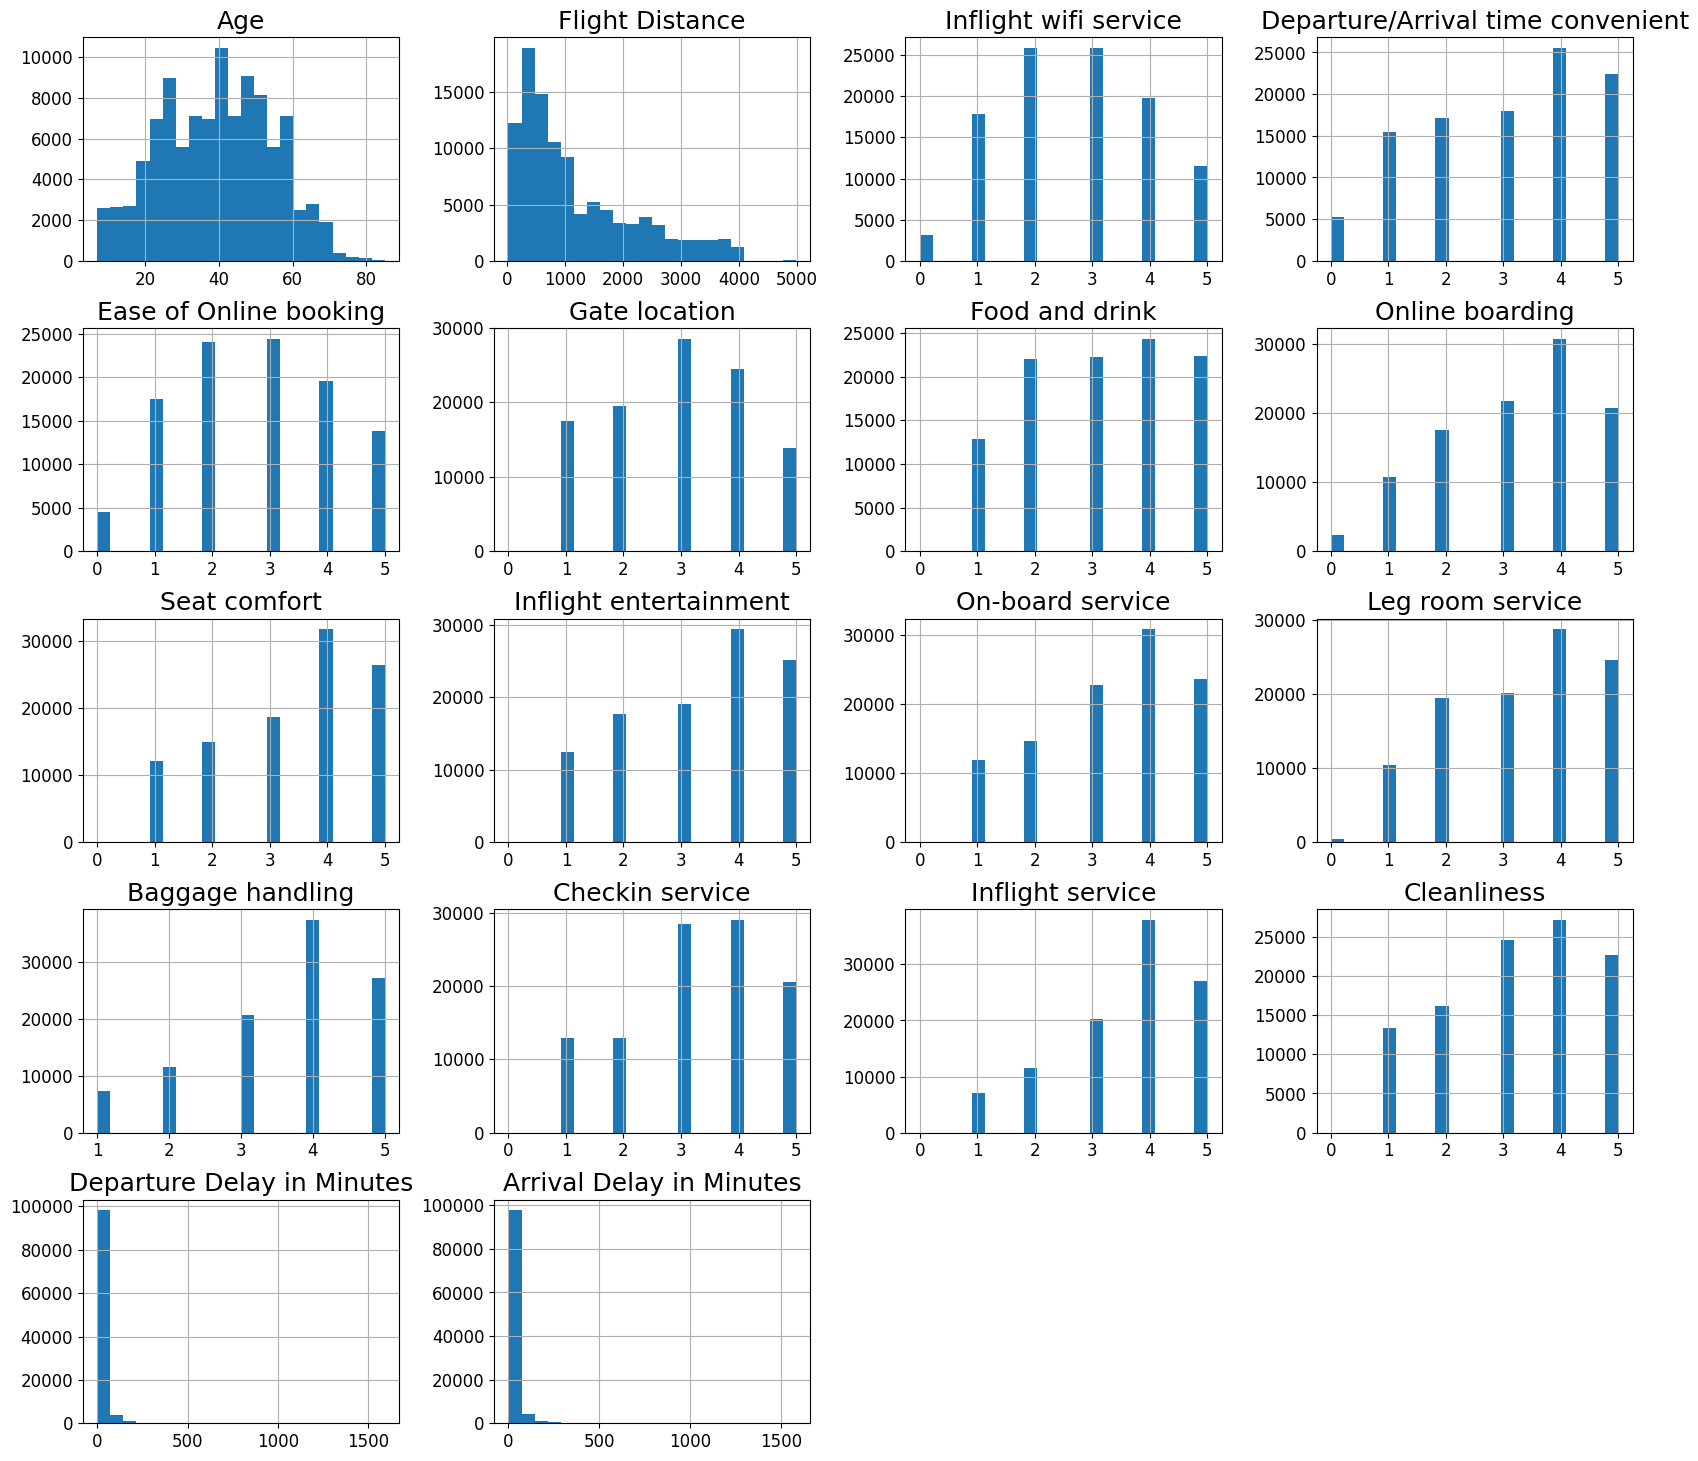

In [11]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=18)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

df.hist(bins=22, figsize=(20, 18), grid=True)
plt.show()

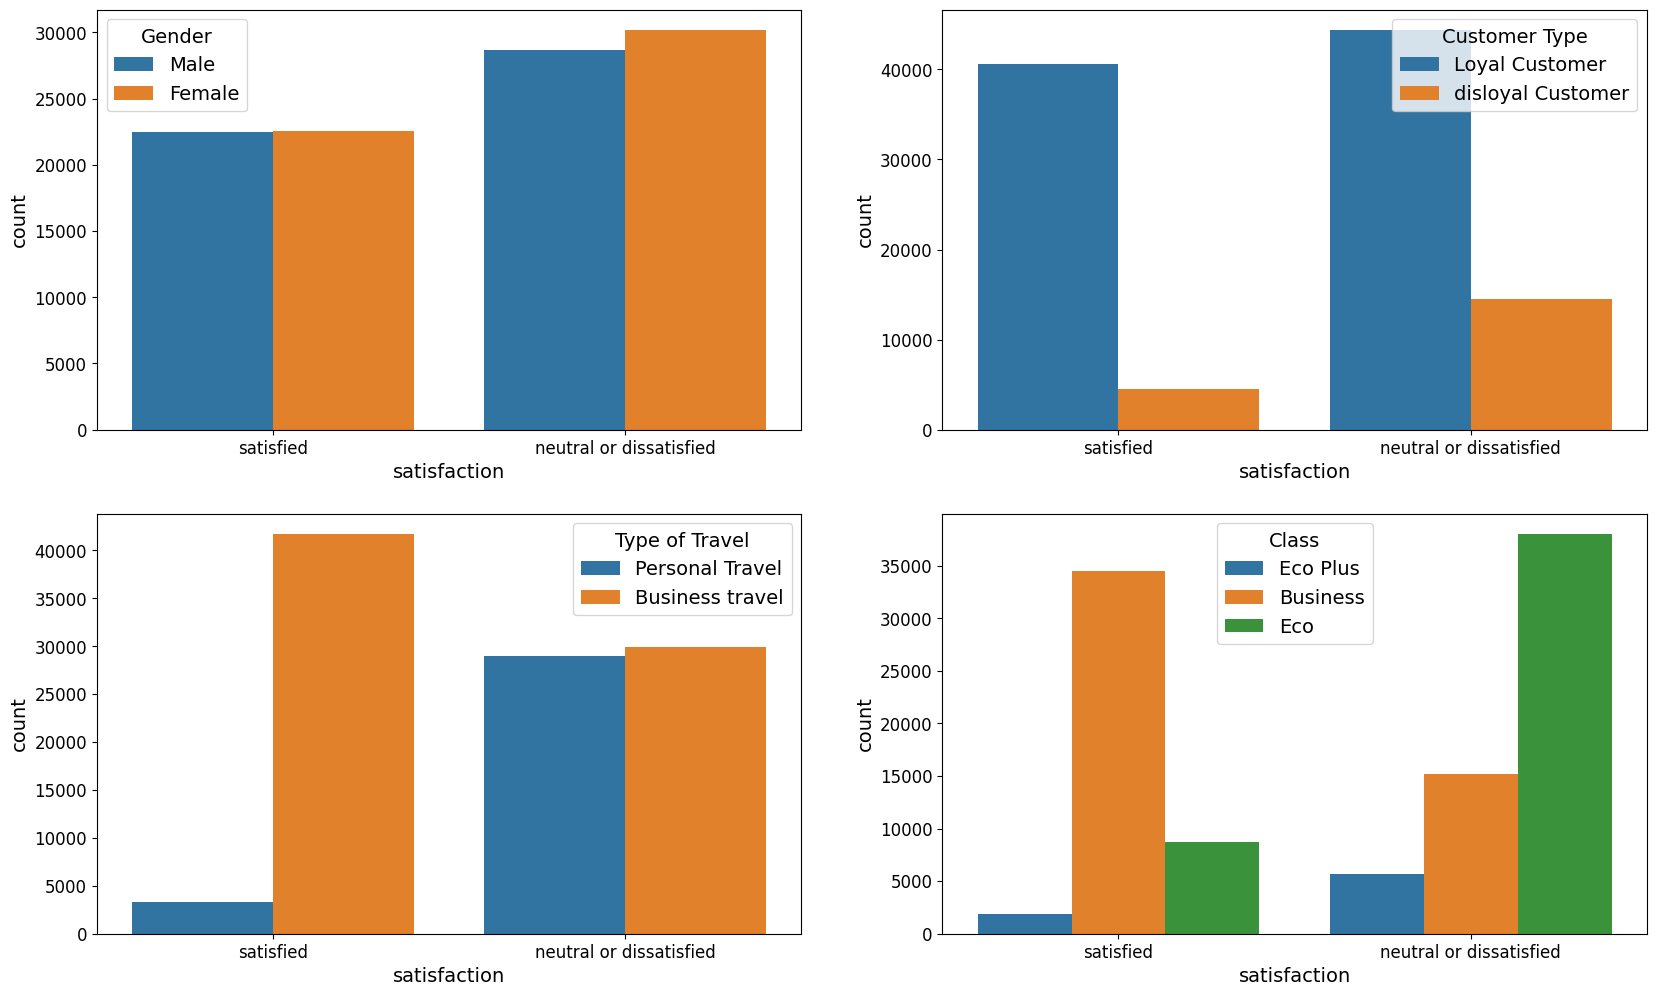

In [12]:
label_data = ["Gender","Customer Type","Type of Travel","Class"]
fig, ax = plt.subplots(2, 2, figsize = (20, 12))
ax = ax.flatten()

for i, column in enumerate(label_data):    
    sns.countplot( data=df , x='satisfaction', hue=column , order=['satisfied' ,'neutral or dissatisfied'] , ax=ax[i])
    
plt.show()

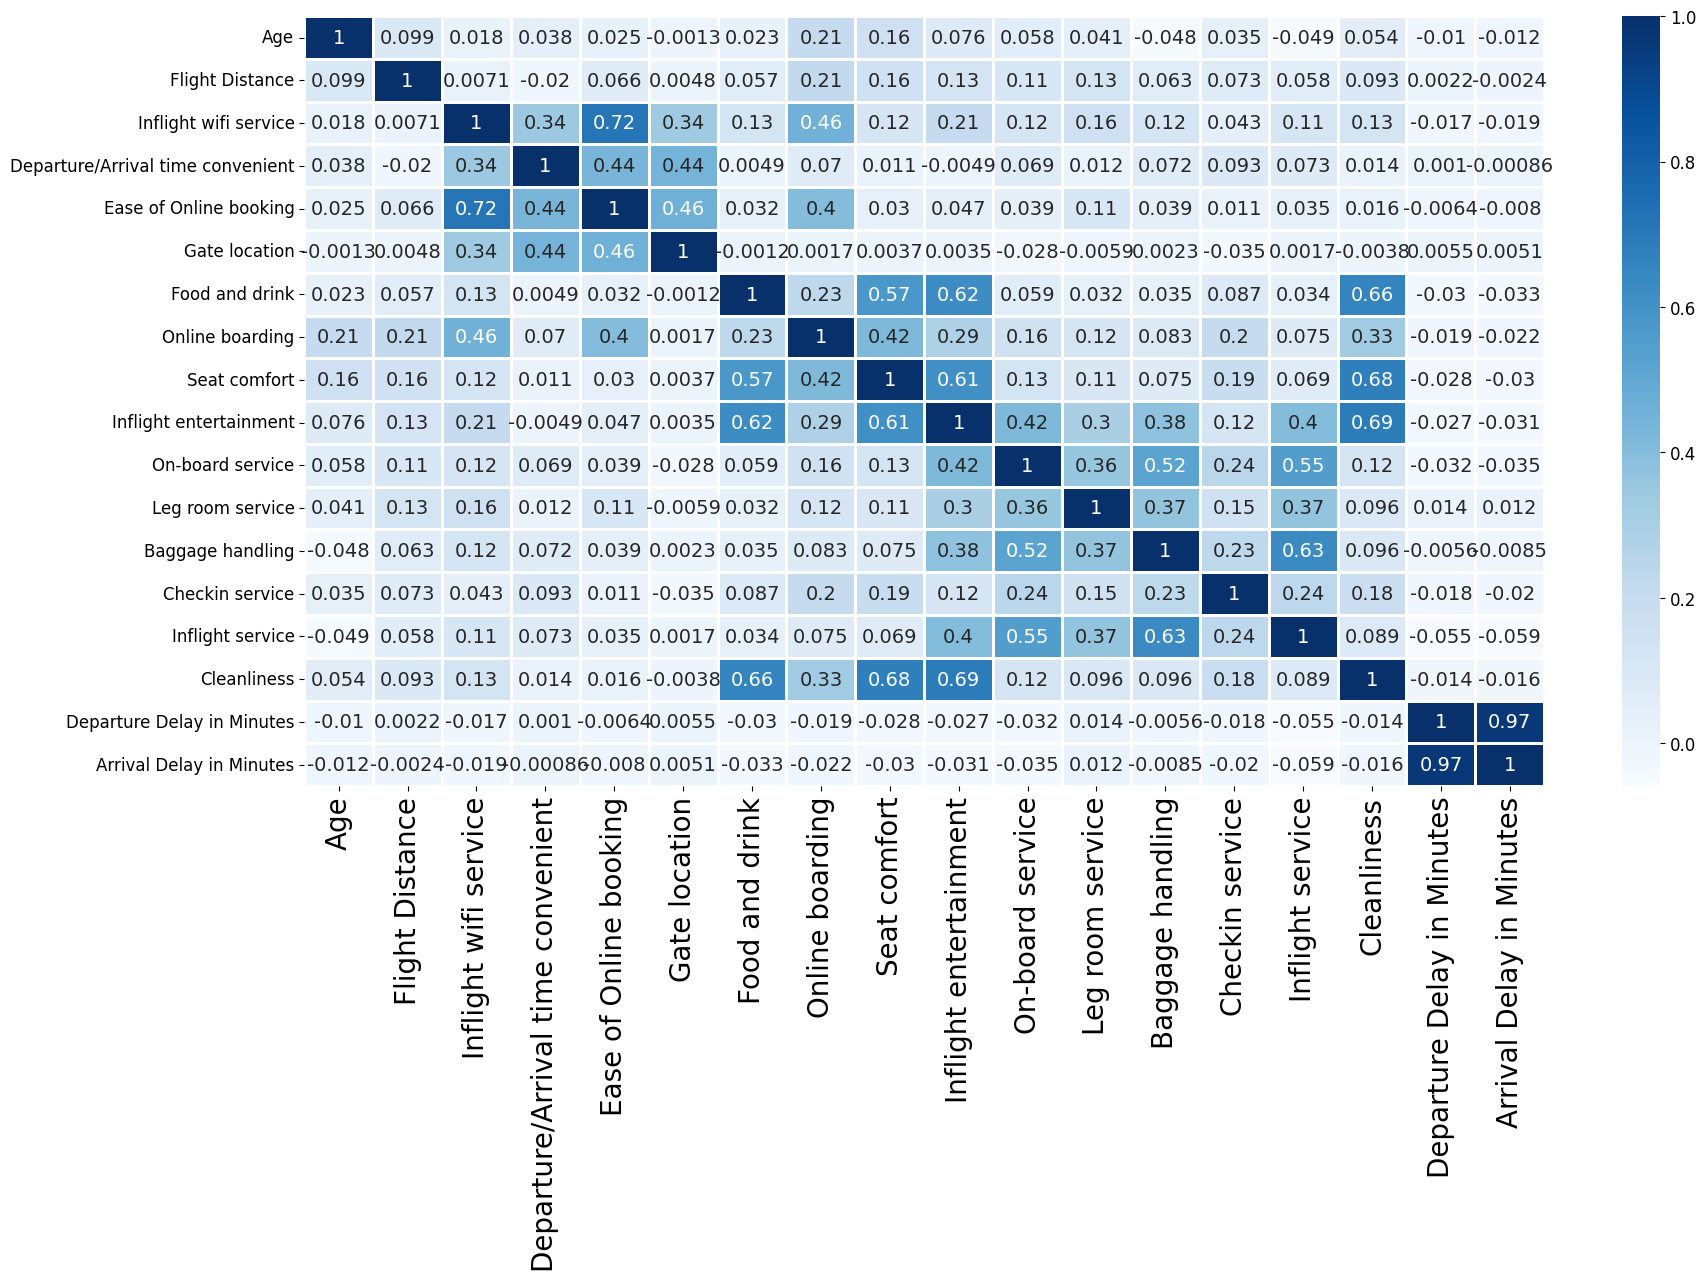

In [13]:
df_correlation = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize = (20,10))
plt.rc('xtick', labelsize=20)

sns.heatmap(df_correlation, cmap='Blues' ,linewidths=2 , linecolor='white' ,annot=True)
plt.show()

##### Drop "Arrival Delay in Minutes" because it has multiple null values and seem likes it has high correlation with departure delays in minute

In [14]:
df.drop(columns="Arrival Delay in Minutes", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  object
 1   Customer Type                      103904 non-null  object
 2   Age                                103904 non-null  int64 
 3   Type of Travel                     103904 non-null  object
 4   Class                              103904 non-null  object
 5   Flight Distance                    103904 non-null  int64 
 6   Inflight wifi service              103904 non-null  int64 
 7   Departure/Arrival time convenient  103904 non-null  int64 
 8   Ease of Online booking             103904 non-null  int64 
 9   Gate location                      103904 non-null  int64 
 10  Food and drink                     103904 non-null  int64 
 11  Online boarding                    103904 non-null  

In [15]:
obj_data = ["Gender","Customer Type","Type of Travel","Class"]
encoder = LabelEncoder()
for col in obj_data:
    df[col] = encoder.fit_transform(df[col])
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,satisfied
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,2,3,1,4,2,3,2,3,neutral or dissatisfied
103900,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,5,5,5,5,4,0,satisfied
103901,1,1,30,0,0,1995,1,1,1,3,...,5,4,3,2,4,5,5,4,7,neutral or dissatisfied
103902,0,1,22,0,1,1000,1,1,1,5,...,1,1,4,5,1,5,4,1,0,neutral or dissatisfied


## Split data

In [16]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardization

In [17]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## Model

### Decision Tree

In [18]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 20, 50, 100, 500, 1000],
}

dtc = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_criterion = grid_search.best_params_["criterion"]
best_max_depth = grid_search.best_params_["max_depth"]


print("Best criterion:", best_criterion)
print("Best max_depth:", best_max_depth)

# Tìm tham số cho các mô hình bên dưới tương tự
# Không cho vào bài nộp vì sẽ chạy rất lâu

Best criterion: entropy
Best max_depth: 20


In [19]:
dtc = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_max_depth)
dtc.fit(X_train_scaled,y_train)
y_pred_dt = dtc.predict(X_test_scaled)

 ************************ Decision Tree Classifier MODEL RESULTS ************************ 
Accuracy score of testing set 0.95 

Precision score of testing set 0.95 

Recall score of testing set 0.95 

F1 score of testing set 0.95 



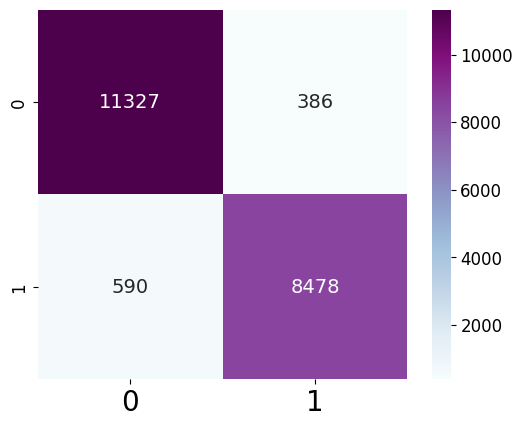

In [20]:
print("\033[1m ************************ Decision Tree Classifier MODEL RESULTS ************************ \033[0m")
print('Accuracy score of testing set', round(accuracy_score(y_test, y_pred_dt),2), '\n')
print('Precision score of testing set', round(precision_score(y_test, y_pred_dt,average="weighted"),2), '\n')
print('Recall score of testing set', round(recall_score(y_test, y_pred_dt,average="weighted"),2), '\n')
print('F1 score of testing set', round(f1_score(y_test, y_pred_dt,average="weighted"),2), '\n')
cm_dtc = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm_dtc, annot=True, square=True, fmt='1', cmap = 'BuPu')
plt.show()

### Random Forest

In [21]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
y_pred_rfc = rfc.predict(X_test_scaled)

 ************************ Random Forest Classifier MODEL RESULTS ************************ 
Accuracy score of testing set 0.96 

Precision score of testing set 0.96 

Recall score of testing set 0.96 

F1 score of testing set 0.96 



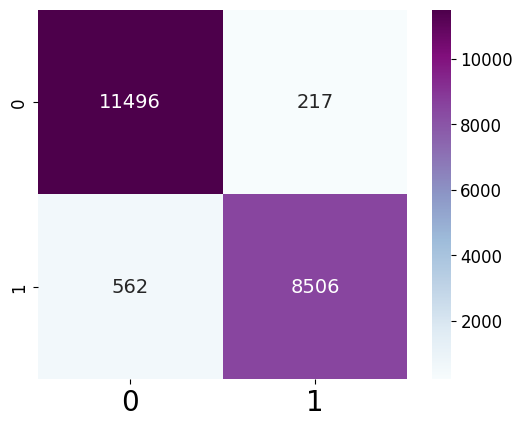

In [22]:
print("\033[1m ************************ Random Forest Classifier MODEL RESULTS ************************ \033[0m")
print('Accuracy score of testing set', round(accuracy_score(y_test, y_pred_rfc),2), '\n')
print('Precision score of testing set', round(precision_score(y_test, y_pred_rfc,average="weighted"),2), '\n')
print('Recall score of testing set', round(recall_score(y_test, y_pred_rfc,average="weighted"),2), '\n')
print('F1 score of testing set', round(f1_score(y_test, y_pred_rfc,average="weighted"),2), '\n')
cm_rfc = confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cm_rfc, annot=True, square=True, fmt='1', cmap = 'BuPu')
plt.show()

### Logistic Regression

In [23]:
log_reg = LogisticRegression(penalty='l2', C=0.01, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

 ************************ LOGISTIC REGRESSION MODEL RESULTS ************************ 
Accuracy score of testing set 0.88 

Precision score of testing set 0.88 

Recall score of testing set 0.88 

F1 score of testing set 0.88 



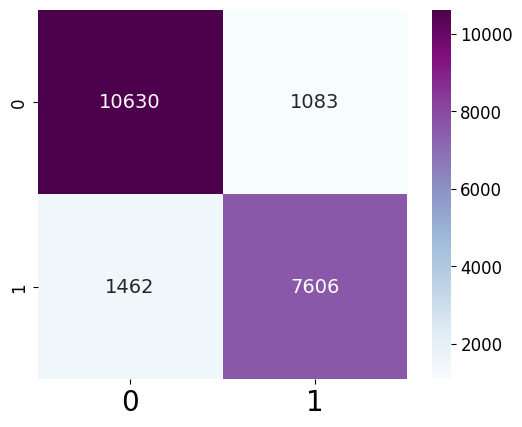

In [24]:
print("\033[1m ************************ LOGISTIC REGRESSION MODEL RESULTS ************************ \033[0m")
print('Accuracy score of testing set', round(accuracy_score(y_test, y_pred_log_reg),2), '\n')
print('Precision score of testing set', round(precision_score(y_test, y_pred_log_reg,average="weighted"),2), '\n')
print('Recall score of testing set', round(recall_score(y_test, y_pred_log_reg,average="weighted"),2), '\n')
print('F1 score of testing set', round(f1_score(y_test, y_pred_log_reg,average="weighted"),2), '\n')
cm_log_reg = confusion_matrix(y_test,y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, square=True, fmt='1', cmap = 'BuPu')
plt.show()

### KNN

In [25]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled,y_train)
y_pred_knn = knn.predict(X_test_scaled)

 ************************ K Neighbors Classifier MODEL RESULTS ************************ 
Accuracy score of testing set 0.93 

Precision score of testing set 0.93 

Recall score of testing set 0.93 

F1 score of testing set 0.93 



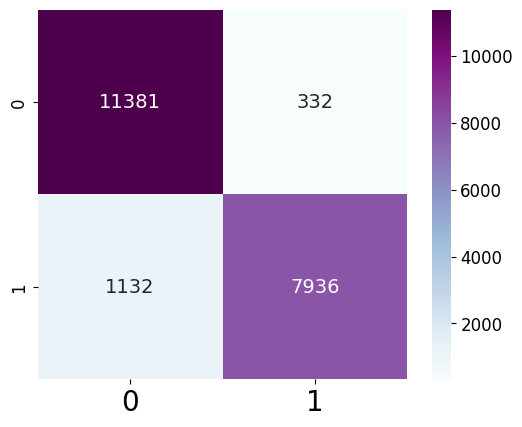

In [26]:
print("\033[1m ************************ K Neighbors Classifier MODEL RESULTS ************************ \033[0m")
print('Accuracy score of testing set', round(accuracy_score(y_test, y_pred_knn),2), '\n')
print('Precision score of testing set', round(precision_score(y_test, y_pred_knn,average="weighted"),2), '\n')
print('Recall score of testing set', round(recall_score(y_test, y_pred_knn,average="weighted"),2), '\n')
print('F1 score of testing set', round(f1_score(y_test, y_pred_knn,average="weighted"),2), '\n')
cm_knn = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm_knn, annot=True, square=True, fmt='1', cmap = 'BuPu')
plt.show()

### Bayes Classifier

In [27]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)

 ************************ Gaussian Naive Bayes MODEL RESULTS ************************ 
Accuracy score of testing set 0.87 

Precision score of testing set 0.87 

Recall score of testing set 0.87 

F1 score of testing set 0.87 



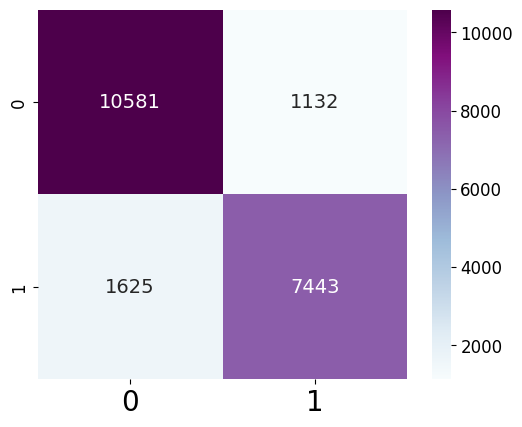

In [28]:
print("\033[1m ************************ Gaussian Naive Bayes MODEL RESULTS ************************ \033[0m")
print('Accuracy score of testing set', round(accuracy_score(y_test, y_pred_gnb), 2), '\n')
print('Precision score of testing set', round(precision_score(y_test, y_pred_gnb, average="weighted"), 2), '\n')
print('Recall score of testing set', round(recall_score(y_test, y_pred_gnb, average="weighted"), 2), '\n')
print('F1 score of testing set', round(f1_score(y_test, y_pred_gnb, average="weighted"), 2), '\n')

cm_gnb = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm_gnb, annot=True, square=True, fmt='1', cmap='BuPu')
plt.show()

### SVM

In [29]:
svm = SVC()
svm.fit(X_train_scaled,y_train)
y_pred_svm = svm.predict(X_test_scaled)

 ************************ SVM MODEL RESULTS ************************ 
Accuracy score of testing set 0.96 

Precision score of testing set 0.96 

Recall score of testing set 0.96 

F1 score of testing set 0.96 



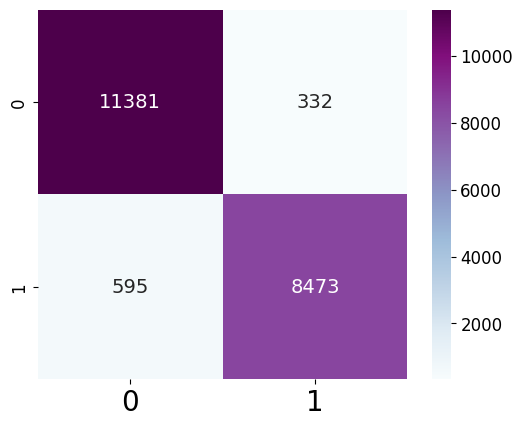

In [30]:
print("\033[1m ************************ SVM MODEL RESULTS ************************ \033[0m")
print('Accuracy score of testing set', round(accuracy_score(y_test, y_pred_svm), 2), '\n')
print('Precision score of testing set', round(precision_score(y_test, y_pred_svm, average="weighted"), 2), '\n')
print('Recall score of testing set', round(recall_score(y_test, y_pred_svm, average="weighted"), 2), '\n')
print('F1 score of testing set', round(f1_score(y_test, y_pred_svm, average="weighted"), 2), '\n')
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, square=True, fmt='1', cmap='BuPu')
plt.show()